In [14]:
import numpy as np 
import math
import matplotlib.pyplot as plt 
  
n = 1000
gfg = np.random.uniform(0, 1, n) 

M = sum(gfg)/n
t = 0
for x in gfg:
    t += (x - M)**2
    
D = t/n
S = math.sqrt(D)

def K(f):
    divisible = 0.0
    divider = 0.0
    
    for i in range(n - f):
        divisible += (gfg[i] - M) * (gfg[i + f] - M)
    
    for i in range(n):
        divider += (gfg[i] - M)**2
    
    return divisible / divider

correlogramm = []
for i in range(n):
    correlogramm.append(K(i))


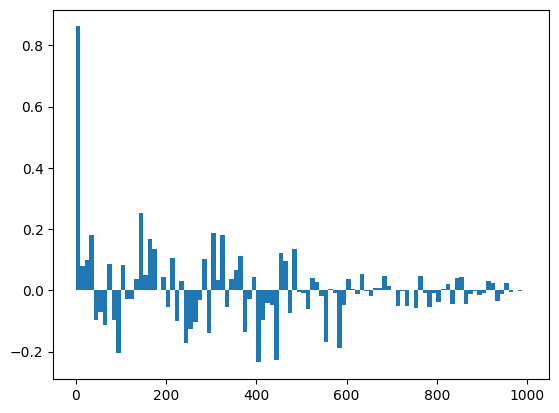

In [15]:
plt.hist(range(n), bins=100, weights=correlogramm)
plt.show()

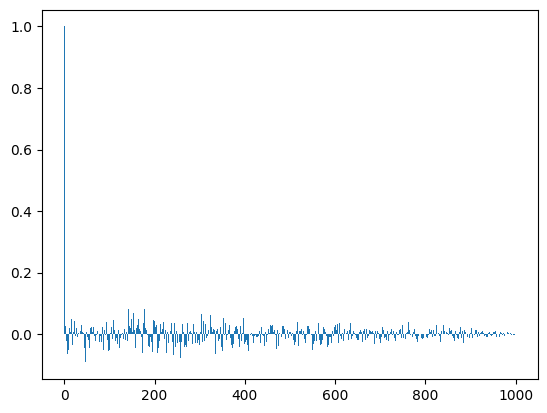

In [16]:
plt.hist(range(n), bins=1000, weights=correlogramm)
plt.show()

In [17]:
def empirical_density_function(data, x):
    count = np.sum(data <= x)
    return count / len(data)

def empirical_distribution_function(data, x):
    sorted_data = np.sort(data)
    count = np.searchsorted(sorted_data, x, side='right')
    return count / len(data)

x_values = np.linspace(min(gfg), max(gfg), 100)
edf_values = [empirical_density_function(gfg, x) for x in x_values]
edf_integral_values = [empirical_distribution_function(gfg, x) for x in x_values]

print(edf_values == edf_integral_values)

True


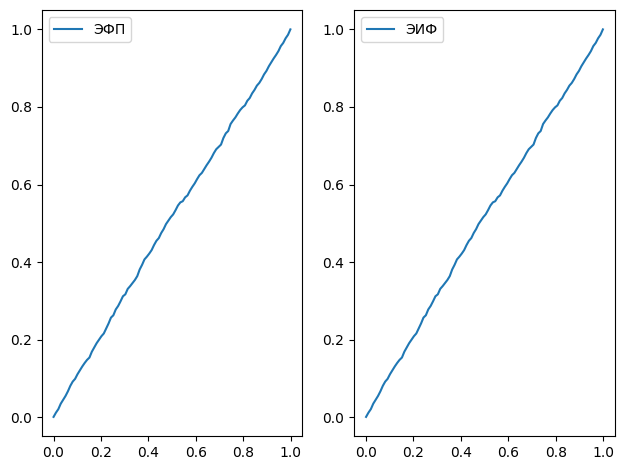

In [23]:
plt.subplot(1, 2, 1)
plt.plot(x_values, edf_values, label='ЭФП')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(x_values, edf_integral_values, label='ЭИФ')
plt.legend()
plt.tight_layout()

In [22]:
import pandas as pd

rows = []
n = 10
while n <= 10000:    
    gfg = np.random.uniform(0, 1, n) 
    M = sum(gfg)/n
    t = 0
    for x in gfg:
        t += (x - M)**2
        
    D = t/n
    
    rows.append([n, "M", M, 0.5, abs(0.5 - M)])
    rows.append(["", "D", D, 0.08333, abs(0.08333 - D)])
    n *= 10

pd.DataFrame(rows, columns=["n", "Оценка распр.", "RAND(эксперимент)", "Теоретическое значение", "Отклонение"])

,n,Оценка распр.,RAND(эксперимент),Теоретическое значение,Отклонение
0,10,M,0.563443,0.50000,0.063443
1,,D,0.091578,0.08333,0.008248
2,100,M,0.500311,0.50000,0.000311
3,,D,0.082106,0.08333,0.001224
4,1000,M,0.503915,0.50000,0.003915
5,,D,0.081010,0.08333,0.002320
6,10000,M,0.501580,0.50000,0.001580
7,,D,0.082765,0.08333,0.000565


In [ ]:
import seaborn as sns

# Создание массива данных
n = 100
gfg = np.random.uniform(0, 1, n)

# Построение гистограммы с помощью seaborn
sns.histplot(gfg, kde=True, bins=100)  # Гистограмма с ядерной оценкой плотности
plt.show()